<a href="https://colab.research.google.com/github/akshaypat444/pytorch_experiments/blob/main/make_more_char_level_model_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MakeMore Character Level Modeling

In [ ]:
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2024-07-23 16:23:59--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.003s  

2024-07-23 16:23:59 (63.3 MB/s) - ‘names.txt’ saved [228145/228145]



In [ ]:
words = open('names.txt', 'r').read().splitlines()

In [ ]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
len(words)

32033

# Bigram Language Model

In [ ]:
b = {}

for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [ ]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [ ]:
import torch

In [ ]:
a = torch.zeros((3,5), dtype=torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [ ]:
a.dtype

torch.float32

In [ ]:
a[1, 3] = 1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [ ]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

In [ ]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

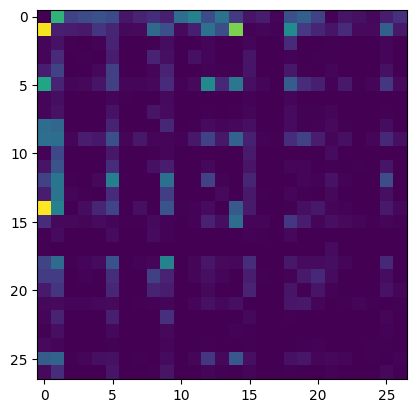

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

In [ ]:
N[0, :]

tensor([ 556, 4951, 1776, 2584, 2382, 1665,  585, 3001, 2524,  766, 2990, 5491,
        3206, 7976, 1209,  476,  575, 3356, 2757, 2742, 1689,  912,  537,  489,
        2184,  970,  929, 6640], dtype=torch.int32)

In [ ]:
p = N[0].float()
p

tensor([   0., 4410., 1306., 1542., 1690., 1531.,  417.,  669.,  874.,  591.,
        2422., 2963., 1572., 2538., 1146.,  394.,  515.,   92., 1639., 2055.,
        1308.,   78.,  376.,  307.,  134.,  535.,  929.])

In [ ]:
# Normalize
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [ ]:
itos = {i:s for s,i in stoi.items()}

In [ ]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [ ]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [ ]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [ ]:
P = N.float()
P = P / P.sum(1, keepdim=True)

tensor(1.)

In [ ]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
  out = []
  ix = 0
  while True:

    p = P[ix]
    # p = N[ix].float()
    # p = p / p.sum()

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break

  print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.


# Create traning set of all bigrams

In [ ]:
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]

    xs.append(ix1)
    ys.append(ix2)


xs = torch.tensor(xs)
ys = torch.tensor(ys)
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [ ]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
xenc.dtype

torch.float32

In [ ]:
W.dtype

torch.float32

In [ ]:
W = torch.randn((27,1))

# 5,27 @ 27,1
# Neuron activations
xenc @ W

tensor([[1.4161],
        [0.0797],
        [1.2611],
        [1.2611],
        [0.1238]])

In [ ]:
W = torch.randn((27,27))

# 5,27 @ 27,27 --> 5, 27 --> (5 examples, neurons)
# Neuron activations
xenc @ W

tensor([[-0.3823, -1.4252,  2.0344,  0.3716, -0.3966,  0.6865,  1.8896,  1.3146,
         -0.9209,  0.1777,  0.8094,  0.8024, -0.7855, -1.2997, -1.3039, -0.1975,
         -0.7729, -0.5400, -0.1765, -0.9143,  1.3059, -1.1982, -0.5571, -0.6695,
         -1.1296,  0.7358,  0.6785],
        [ 0.4051,  0.2658, -0.1201,  0.6484,  0.7307,  1.1265,  0.6086, -0.8209,
          0.0220,  0.2737, -1.3829,  0.2227,  0.4157, -0.4596,  2.5076,  1.4527,
          0.7195,  1.5393, -0.3532, -1.0287, -0.8796, -1.2391, -0.5988, -0.2325,
          0.2954,  1.5106,  0.2889],
        [ 0.1045,  0.0406, -1.1316, -1.4776, -0.7543,  0.6022,  1.4983, -0.3040,
         -0.6454,  1.4385, -0.1663, -0.1523, -1.8698,  0.4579,  0.8131, -0.1172,
          0.5072,  0.9706, -0.5513,  1.4444, -0.4885, -2.1018,  0.6876,  1.2908,
         -0.8343, -1.2313,  0.8670],
        [ 0.1045,  0.0406, -1.1316, -1.4776, -0.7543,  0.6022,  1.4983, -0.3040,
         -0.6454,  1.4385, -0.1663, -0.1523, -1.8698,  0.4579,  0.8131, -0.1172

In [ ]:
# Exponentiation turned the numbers into positives
logits = (xenc @ W)
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)

In [ ]:
prob.max(1)

torch.return_types.max(
values=tensor([0.1793, 0.2333, 0.1115, 0.1115, 0.2073]),
indices=tensor([ 2, 14,  6,  6, 26]))